In [16]:
# import packages
import numpy as np
import pandas as pd

import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# use statsmodels for linear regression
import statsmodels.formula.api as smf

# use sklearn for linear regression
from sklearn.linear_model import LinearRegression

In [17]:
# gather data from yahoo
# will use the SPY for the market and will compare Delta and United

# define start and end dates
end_date = datetime.date(2024,1,1)
start_date = end_date - pd.Timedelta(days=365*3)

# get the stock data
dal_df = yf.download("DAL",start=start_date,end=end_date,progress=False)
ual_df = yf.download("UAL",start=start_date,end=end_date,progress=False)
spy_df = yf.download("SPY",start=start_date,end=end_date,progress=False)

# calc the log returns
dal_df['dal'] = np.log(dal_df['Adj Close']/dal_df['Adj Close'].shift(1))
ual_df['ual'] = np.log(ual_df['Adj Close']/ual_df['Adj Close'].shift(1))
spy_df['spy'] = np.log(spy_df['Adj Close']/spy_df['Adj Close'].shift(1))


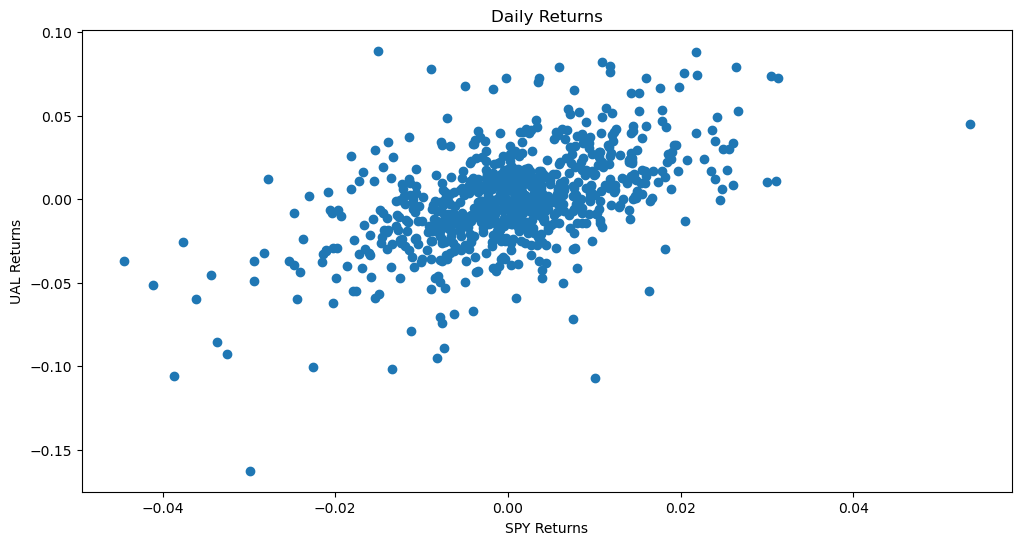

In [18]:
# combine dataframes
stock_df = pd.concat([spy_df['spy'],ual_df['ual'],dal_df['dal']],axis=1).dropna()

# create scatter plot
plt.figure(figsize=(12,6))
plt.xlabel('SPY Returns')
plt.ylabel('UAL Returns')
plt.title('Daily Returns')
plt.scatter(stock_df['spy'],stock_df['ual'])
plt.show()

In [19]:
# calc the correlation between x and y's
stock_df.corr()

,spy,ual,dal
spy,1.000000,0.534059,0.579877
ual,0.534059,1.000000,0.903354
dal,0.579877,0.903354,1.000000


In [20]:
# simple linear regression
sm_model = smf.ols('ual ~ spy',data=stock_df)
sm_model_ual = sm_model.fit()
print(sm_model_ual.summary())

param_sm = sm_model_ual.params



                            OLS Regression Results                            
Dep. Variable:                    ual   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     299.3
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.12e-56
Time:                        15:43:35   Log-Likelihood:                 1723.4
No. Observations:                 752   AIC:                            -3443.
Df Residuals:                     750   BIC:                            -3434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0006      0.001     -0.632      0.5

In [21]:
# print the parameter estimates of the simple linear regression

print("\n")
print("====================================================================")
print("The intercept in the statsmodels regression model is", \
      np.round(param_sm.Intercept, 4))
print("The slope in the statsmodels regression model is", \
      np.round(param_sm.spy, 4))
print("====================================================================")
print("\n")
####################################################



The intercept in the statsmodels regression model is -0.0006
The slope in the statsmodels regression model is 1.3939




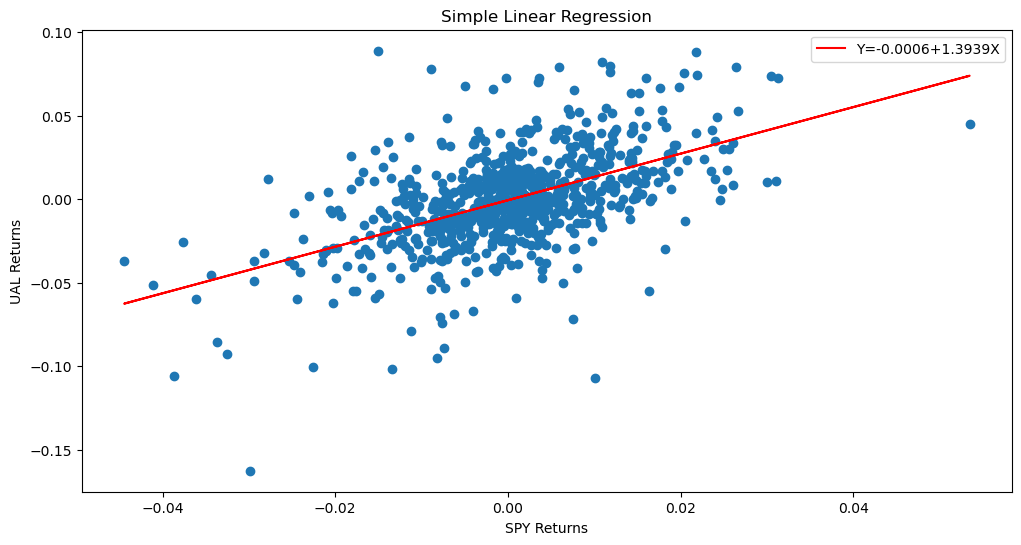

In [22]:
# add linear regression line to the scatter plot above
plt.figure(figsize=(12,6))
plt.xlabel('SPY Returns')
plt.ylabel('UAL Returns')
plt.title('Simple Linear Regression')
plt.scatter(stock_df['spy'],stock_df['ual'])
plt.plot(stock_df['spy'],param_sm.Intercept+param_sm.spy * stock_df['spy'],
         label='Y={:.4f}+{:.4f}X'.format(param_sm.Intercept, param_sm.spy), 
         color='red')
plt.legend()
plt.show()

In [23]:
# multiple linear regression model
mm_model = smf.ols('ual ~ spy + dal',data=stock_df)
mm_model_ual = mm_model.fit()
print(mm_model_ual.summary())

param_mm = mm_model_ual.params


                            OLS Regression Results                            
Dep. Variable:                    ual   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1663.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):          3.11e-276
Time:                        15:43:36   Log-Likelihood:                 2234.1
No. Observations:                 752   AIC:                            -4462.
Df Residuals:                     749   BIC:                            -4448.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.905e-05      0.000     -0.196      0.8

In [24]:
# print the parameter estimates of the multiple linear regression

print("\n")
print("====================================================================")
print("The intercept and slopes in the statsmodels regression model are")
print("\n")
print(param_mm)
print("====================================================================")
print("\n")
####################################################



The intercept and slopes in the statsmodels regression model are


Intercept   -0.000089
spy          0.040208
dal          1.073704
dtype: float64




In [25]:
# linear regression using scikitlearn this time
# simple linear regression
sm_sk_model = LinearRegression()
X = stock_df['spy'].values.reshape(-1,1)
sm_sk_model_ual = sm_sk_model.fit(X,stock_df['ual'])

print("The intercept in the sklearn regression result is", \
      np.round(sm_sk_model_ual.intercept_, 4))
print("The slope in the sklearn regression model is", \
      np.round(sm_sk_model_ual.coef_[0], 4))

The intercept in the sklearn regression result is -0.0006
The slope in the sklearn regression model is 1.3939


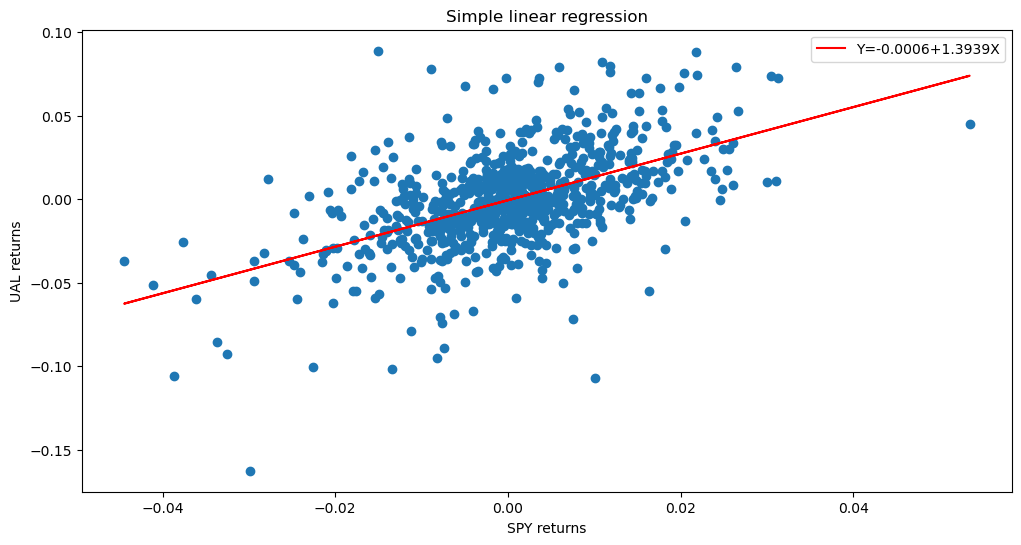

In [26]:
# plot the simple linear regression model from scikit
plt.figure(figsize = (12, 6))
plt.xlabel("SPY returns")
plt.ylabel("UAL returns")
plt.title("Simple linear regression")
plt.scatter(stock_df['spy'], stock_df['ual'])
plt.plot(X, sm_sk_model.predict(X), 
         label='Y={:.4f}+{:.4f}X'.format(sm_sk_model_ual.intercept_, \
                                         sm_sk_model_ual.coef_[0]), 
             color='red')
plt.legend()
plt.show()

In [28]:
# multiple variable regression
mm_sk_model = LinearRegression()
X = stock_df[['spy','dal']]
Y = stock_df['ual']
mm_sk_model_ual = mm_sk_model.fit(X,Y)

print("The intercept in the sklearn regression result is", \
      np.round(mm_sk_model_ual.intercept_, 4))
print("The slope in the sklearn regression model is", \
      np.round(mm_sk_model_ual.coef_[0], 4))

The intercept in the sklearn regression result is -0.0001
The slope in the sklearn regression model is 0.0402
